# Q6

Import some prerequisites:

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [34]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

## dilate

In [35]:
def dilate(img, kernel): 
    '''
    Dialates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dialate.
        kernel (np.ndarray): The kernel to dialate image with.

    Returns:
        np.ndarray: The dialated image.
    '''
    # initalize output
    img_dialated = np.zeros(img.shape)
    
    # define constants
    image_height, image_width = img.shape
    kernel_height, kernel_width = kernel.shape

    #rotate kernel 180 degrees
    kernel = np.flipud(np.fliplr(kernel)) 

    # pad the image with zeros
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # move kernel across the image
    k=0
    for i in range(pad_height ,image_height + pad_height):
        m=0 
        for j in range(pad_width ,image_width + pad_width): 
            window = padded_image[i - pad_height : i + pad_height + 1 , j - pad_width : j + pad_width + 1] 
            img_dialated[k,m] = np.max(np.multiply(window , kernel)) # maximum for dilation
            m+=1
        k+=1 
    return img_dialated

Test implementation

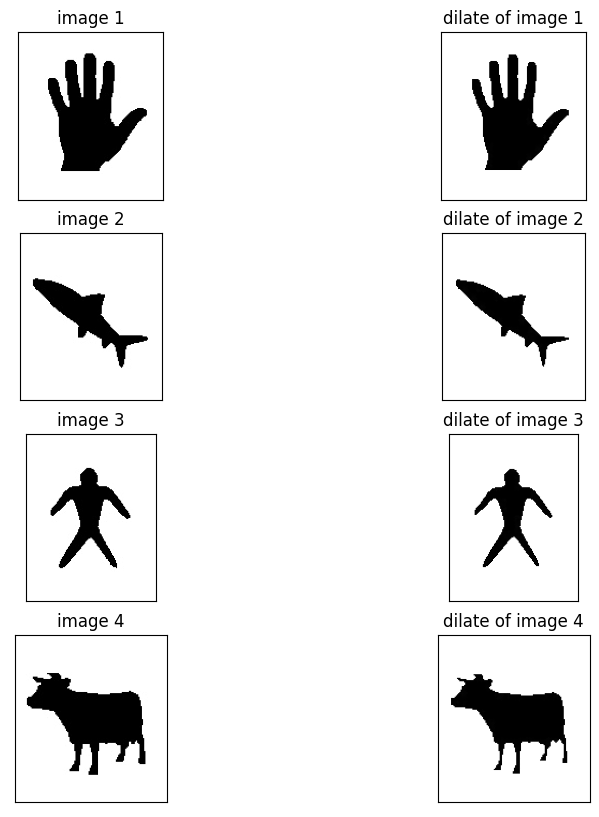

In [36]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-dilate')

## erode

In [37]:
def erode(img, kernel): 
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    # initalize output
    img_eroded = np.zeros(img.shape)
    
    # define constants
    image_height, image_width = img.shape
    kernel_height, kernel_width = kernel.shape

    # pad the image with zeros
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # move kernel across the image
    k=0
    for i in range(pad_height ,image_height + pad_height):
        m=0 
        for j in range(pad_width ,image_width + pad_width): 
            window = padded_image[i - pad_height : i + pad_height + 1 , j - pad_width : j + pad_width + 1]
            img_eroded[k,m] = get_minimum(window,kernel) #minimum for erosion
            m+=1
        k+=1 
    return img_eroded

def get_minimum(window,kernel):
    min = 256
    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j] != 0:
                if window[i,j] < min:
                    min = window[i,j]
    return min



Test your implementation

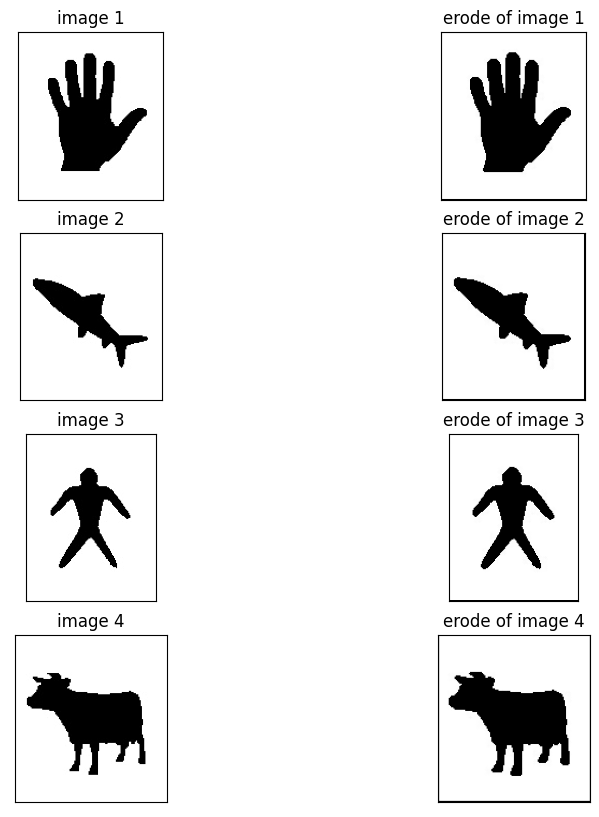

In [38]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-erode')

## open

In [39]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    # initalize output
    img_opened = np.zeros(img.shape)

    # first erode
    img_opened = erode(img,kernel)

    # then dilate
    img_opened = dilate(img,kernel)
    
    return img_opened

Test your implementatino

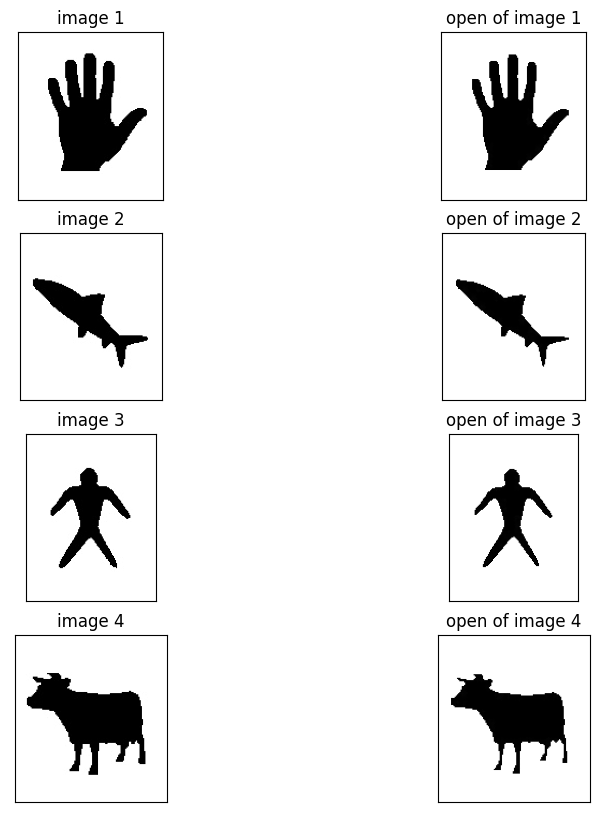

In [40]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-open')

In [41]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    # initalize output
    img_closed = np.zeros(img.shape)

    # first dilate
    img_closed = dilate(img,kernel)

    # then erode
    img_closed = erode(img,kernel)
    
    return img_closed

Test your implemention

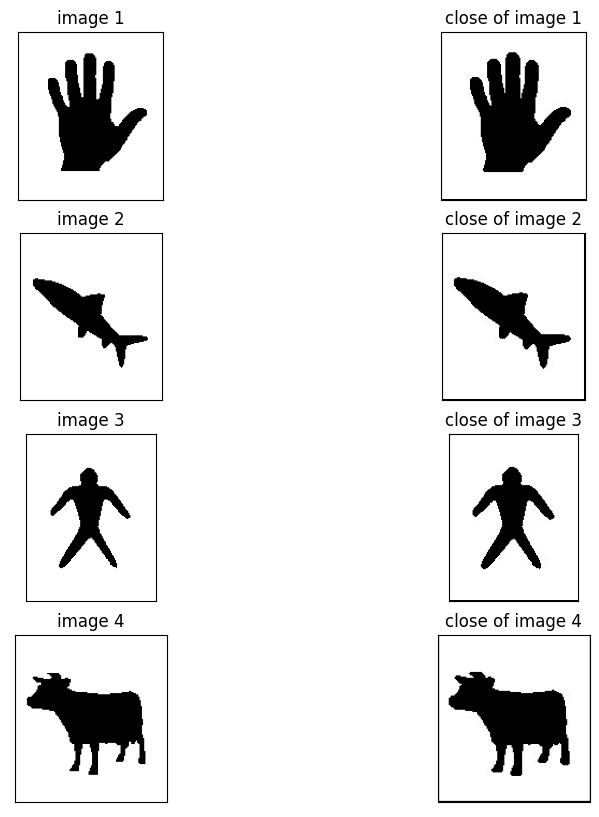

In [42]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-close')

# Part 2

## dilate -b

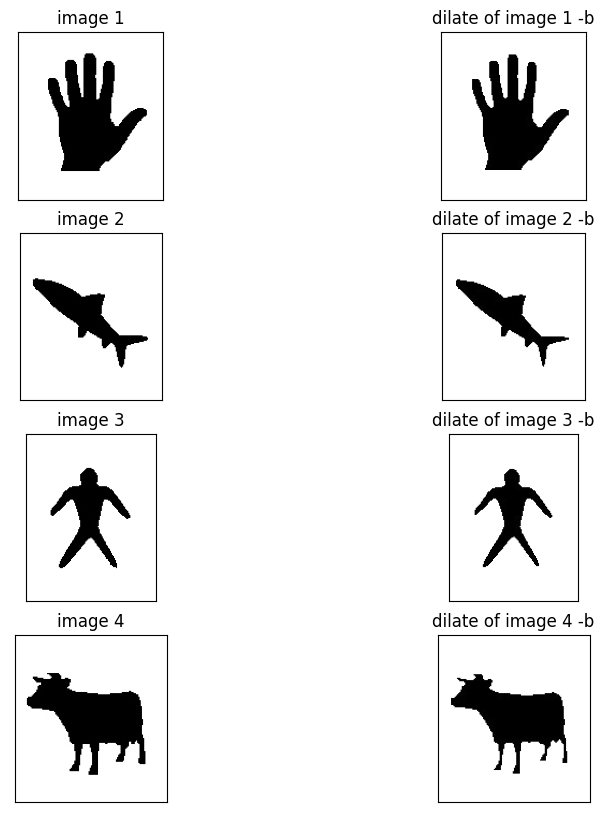

In [43]:
image_list = []
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate_b = cv2.dilate(image1, kernel)
image_list.append([image1_dilate_b, 'dilate of image 1 -b','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate_b = cv2.dilate(image2, kernel)
image_list.append([image2_dilate_b, 'dilate of image 2 -b','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate_b = cv2.dilate(image3, kernel)
image_list.append([image3_dilate_b, 'dilate of image 3 -b', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate_b = cv2.dilate(image4, kernel)
image_list.append([image4_dilate_b, 'dilate of image 4 -b', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-dilate')

## erode -b

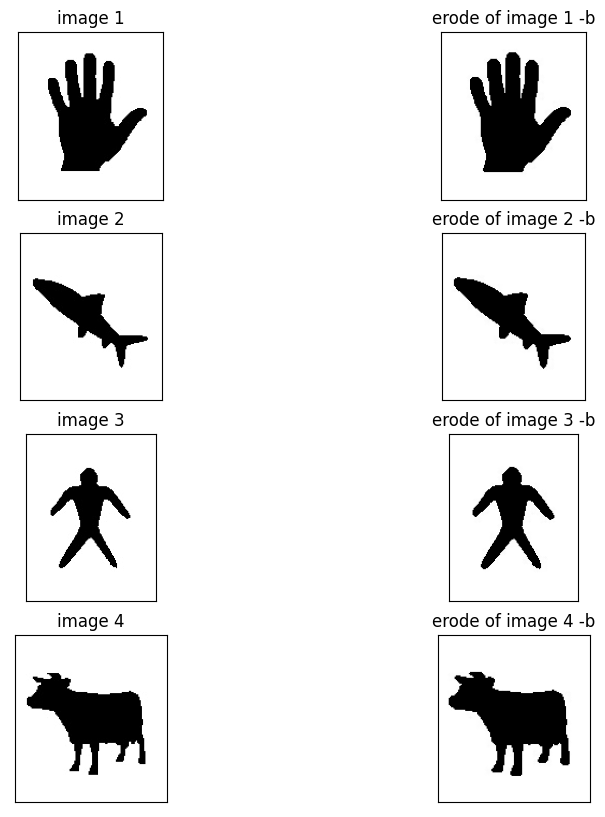

In [44]:
image_list = []
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode_b = cv2.erode(image1, kernel)
image_list.append([image1_erode_b, 'erode of image 1 -b','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode_b = cv2.erode(image2, kernel)
image_list.append([image2_erode_b, 'erode of image 2 -b','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode_b = cv2.erode(image3, kernel)
image_list.append([image3_erode_b, 'erode of image 3 -b', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode_b = cv2.erode(image4, kernel)
image_list.append([image4_erode_b, 'erode of image 4 -b', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-erode')

## open -b

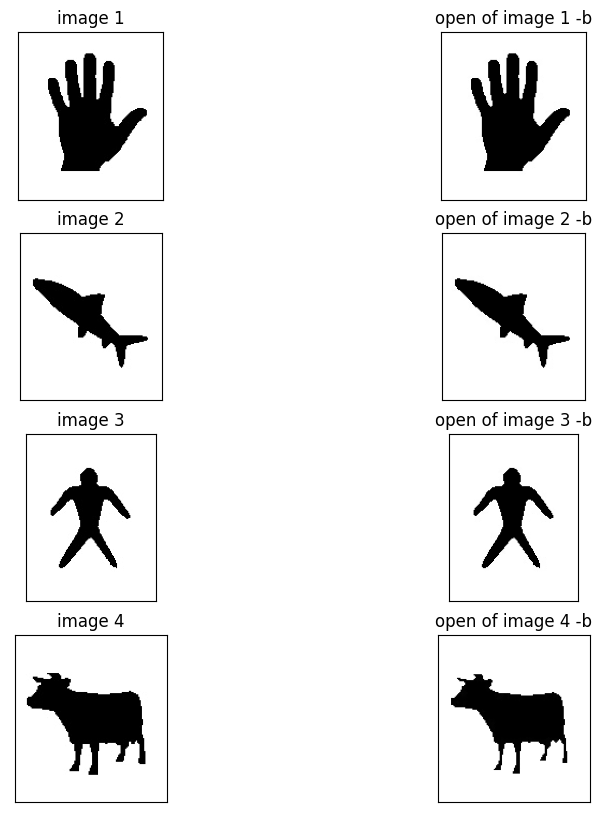

In [45]:
image_list = []
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open_b = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel)
image_list.append([image1_open_b, 'open of image 1 -b','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open_b = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel)
image_list.append([image2_open_b, 'open of image 2 -b','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open_b = cv2.morphologyEx(image3, cv2.MORPH_OPEN, kernel)
image_list.append([image3_open_b, 'open of image 3 -b', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open_b = cv2.morphologyEx(image4, cv2.MORPH_OPEN, kernel)
image_list.append([image4_open, 'open of image 4 -b', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-open')

## close -b

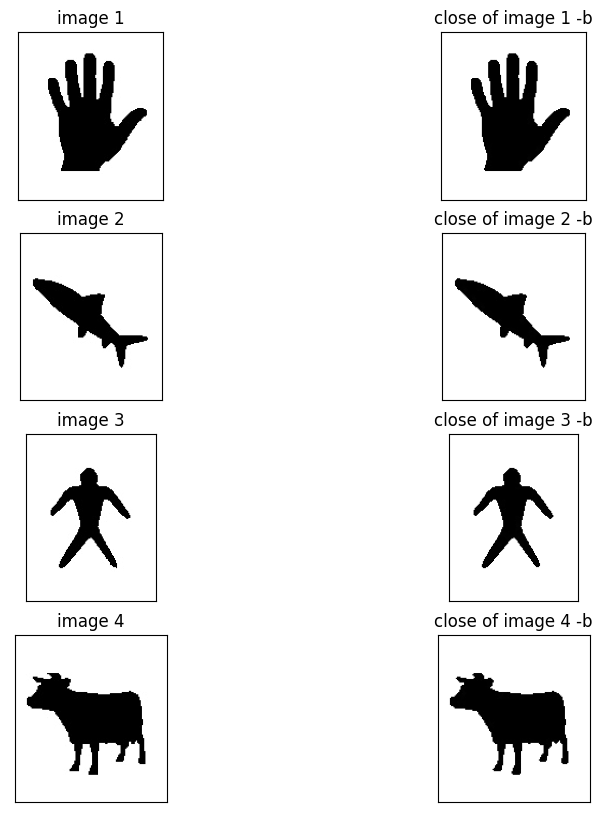

In [46]:
image_list = []
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close_b = cv2.morphologyEx(image1, cv2.MORPH_CLOSE, kernel)
image_list.append([image1_close_b, 'close of image 1 -b','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close_b = cv2.morphologyEx(image2, cv2.MORPH_CLOSE, kernel)
image_list.append([image2_close_b, 'close of image 2 -b','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close_b = cv2.morphologyEx(image3, cv2.MORPH_CLOSE, kernel)
image_list.append([image3_close_b, 'close of image 3 -b', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close_b = cv2.morphologyEx(image4, cv2.MORPH_CLOSE, kernel)
image_list.append([image4_close_b, 'close of image 4 -b', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-close')

# Part 3: optional
Skeleton of image

In [47]:
def get_skeleton(image, kernel):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    res = image.copy()

    while(np.max(res) != 0):
        previous = res.copy()
        res = cv2.dilate(res,kernel)
    
    
    return previous

Test your implementation (don't change this cell).

In [48]:
image_list = []
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, kernel)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, kernel)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, kernel)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, kernel)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-c')

KeyboardInterrupt: 

End!!!